In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [4]:
data_set=pd.read_csv('car data.csv')

In [5]:
data_set.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data_set.shape

(301, 9)

In [7]:
data_set.value_counts()

Car_Name              Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
ertiga                2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
fortuner              2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
Activa 4g             2017  0.40           0.51           1300        Petrol     Individual   Automatic     0        1
Bajaj  ct 100         2015  0.18           0.32           35000       Petrol     Individual   Manual        0        1
Bajaj Avenger 150     2016  0.75           0.80           7000        Petrol     Individual   Manual        0        1
                                                                                                                    ..
Hero Passion Pro      2016  0.45           0.55           1000        Petrol     Individual   Manual        0        1
Hero Passion X pro    2016  0.50           0.55      

In [8]:
data_set['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [9]:
data_set.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
data_set['Fuel_Type'].value_counts()
data_set['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
data_set.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data_set.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data_set.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


C:\Users\hpriy\AppData\Local\Temp\ipykernel_114728\2492141037.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\hpriy\AppData\Local\Temp\ipykernel_114728\2492141037.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_set.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\hpriy\AppData\Local\Temp\ipykernel_114728\2492141037.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

In [12]:
data_set.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
data_set['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [14]:
X=data_set.drop(['Car_Name','Selling_Price'],axis=1)
Y=data_set['Selling_Price']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
training_data_prediction=lin_reg_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.8838169193709797


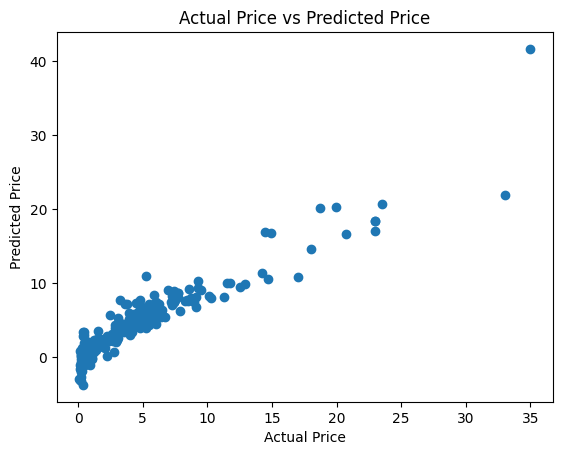

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


R squared error :  0.8401532365378493


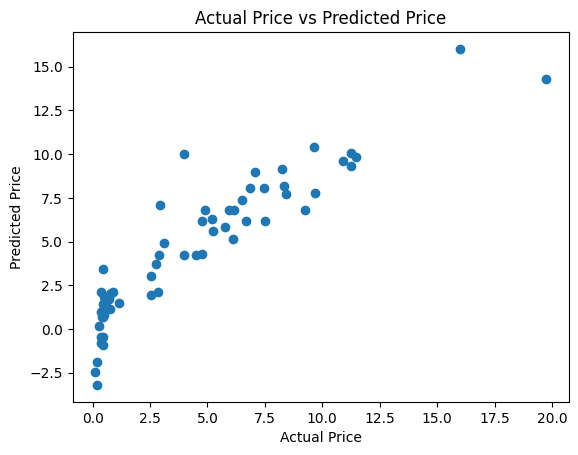

In [25]:
test_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

R squared error :  0.8435873952582826


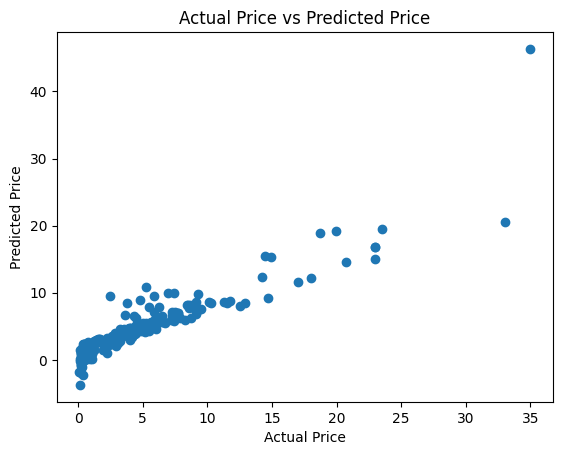

In [26]:
lassp_model=Lasso()
lassp_model.fit(X_train,Y_train)
training_data_prediction=lassp_model.predict(X_train)
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error : ",error_score)
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

R squared error :  0.8401532365378493


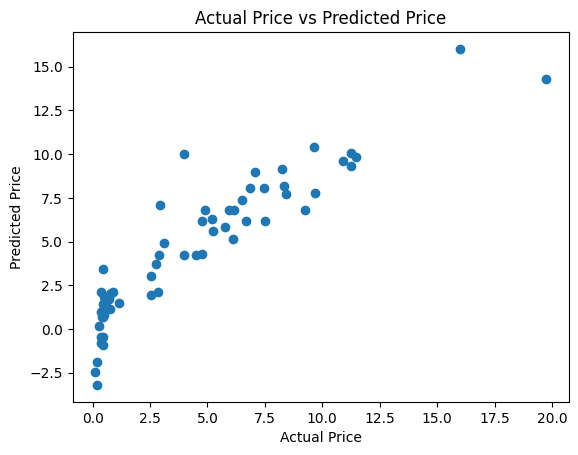

In [27]:
test_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()